In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model_less_weird import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 20000
N_bar = 5000
num_states = 100
steps = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, steps=steps)

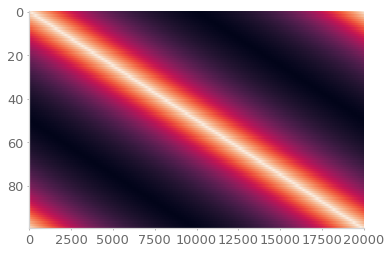

In [4]:
plt.figure()
plt.imshow(place_inputs, aspect='auto')
plt.show()

In [5]:
cache_states = [n*2 for n in range(50)]

# Run Task (no learning)

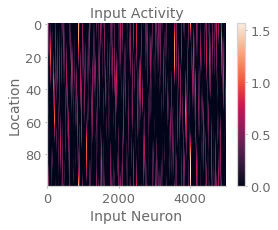

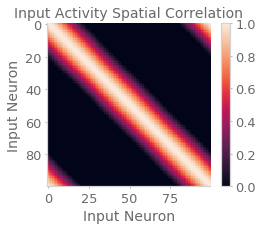

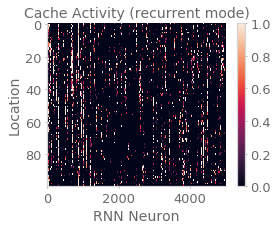

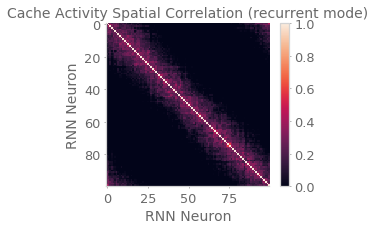

Sparsity: 0.124294


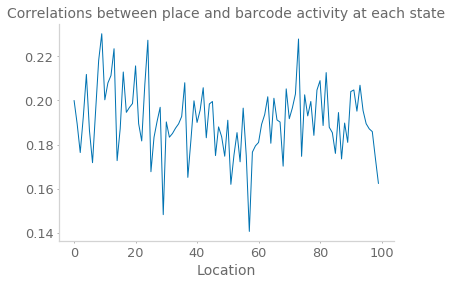

Now I just cached at location: 0


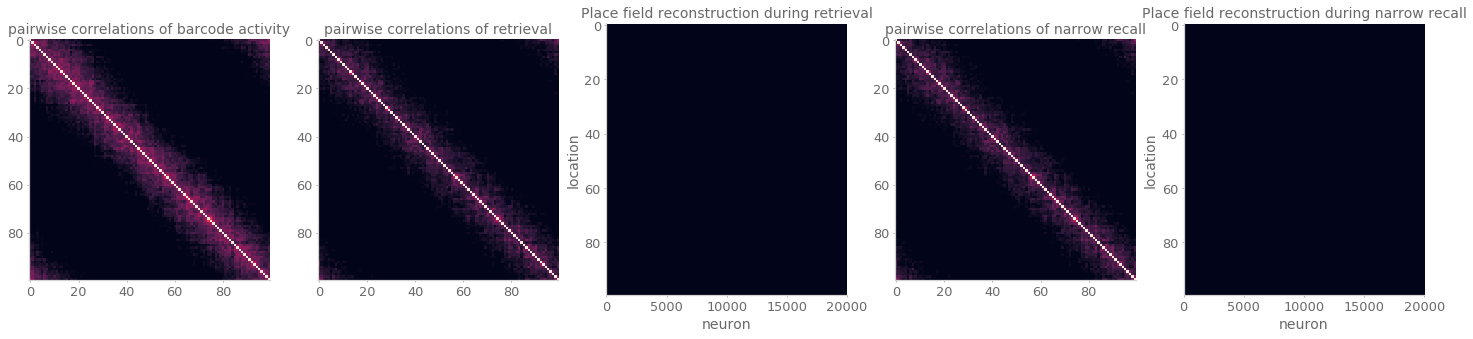

Now I just cached at location: 2


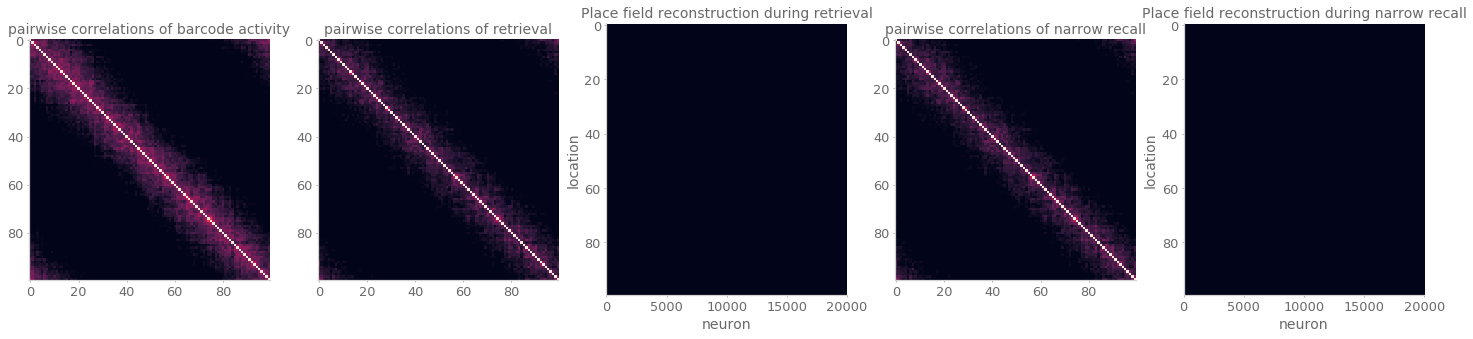

Now I just cached at location: 4


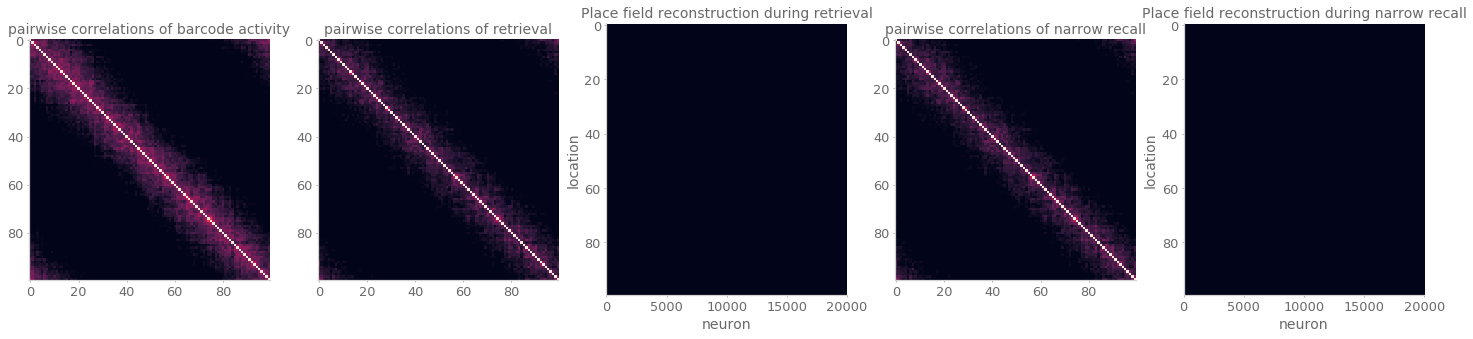

Now I just cached at location: 6


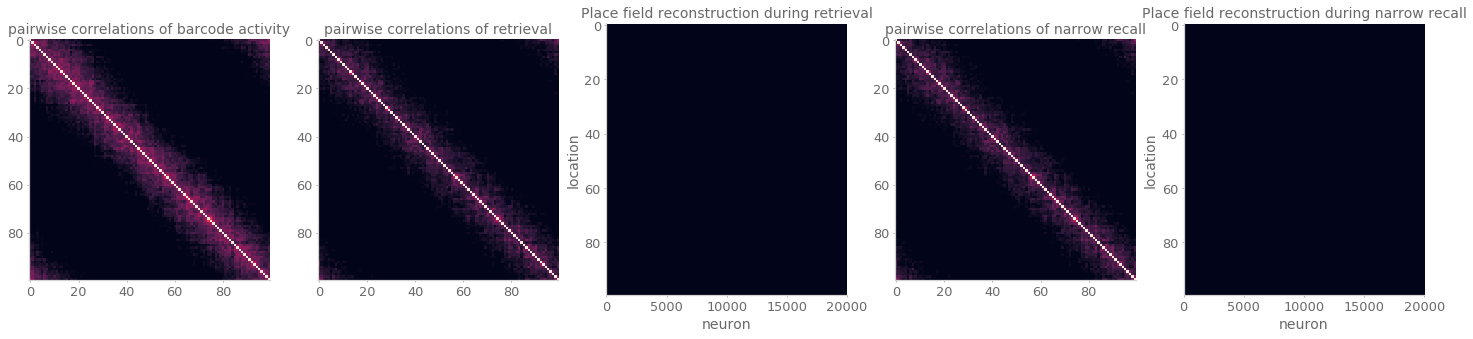

Now I just cached at location: 8


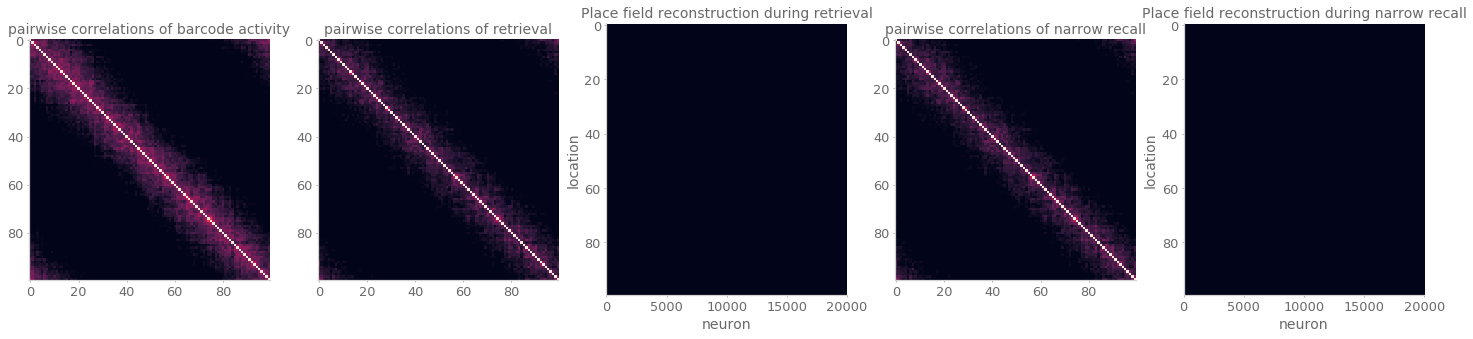

Now I just cached at location: 10


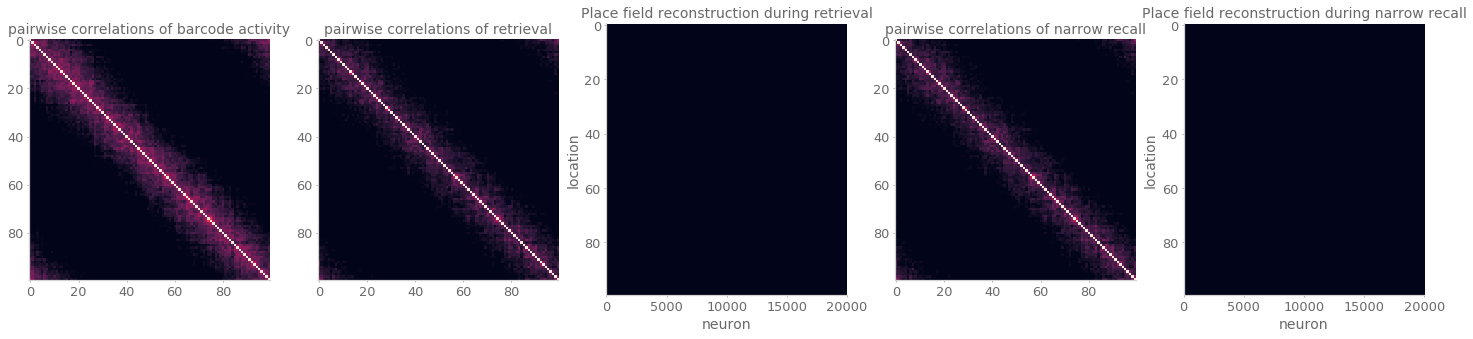

Now I just cached at location: 12


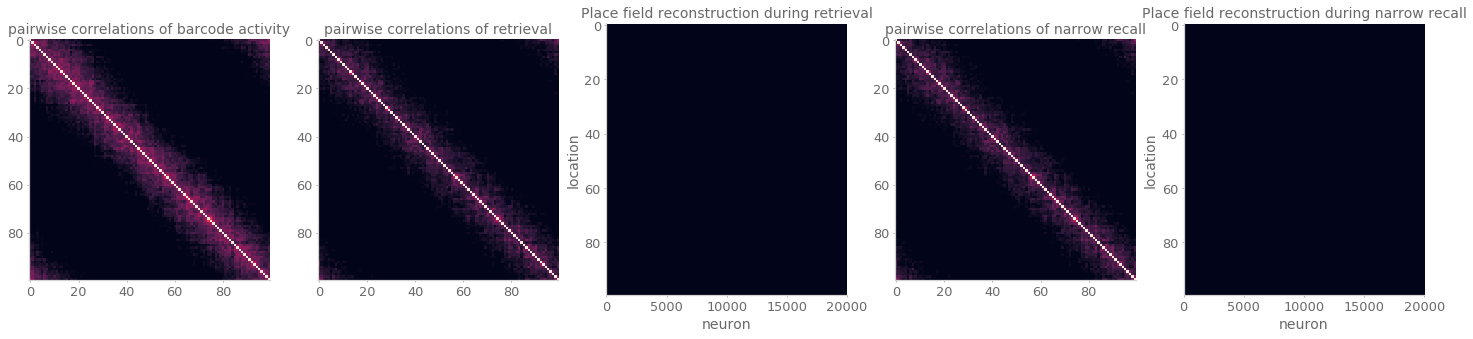

Now I just cached at location: 14


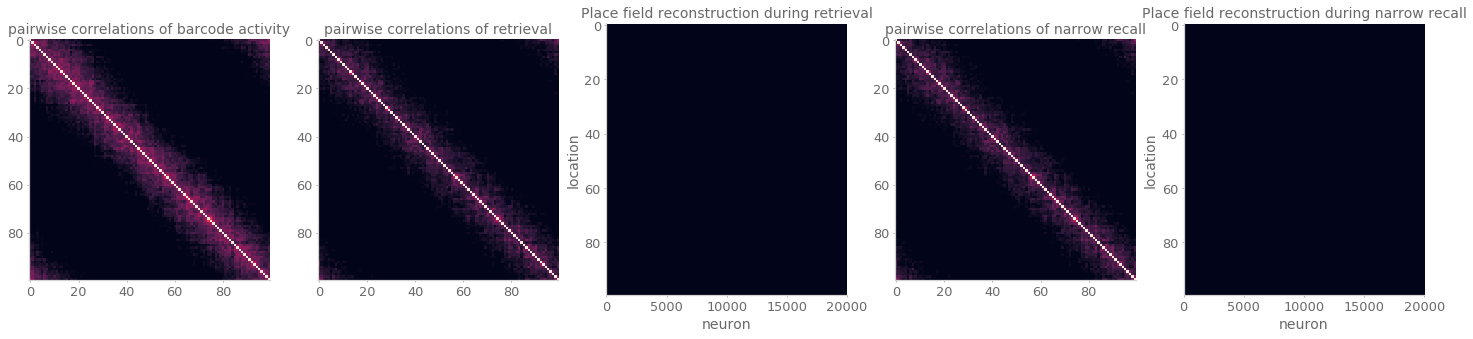

Now I just cached at location: 16


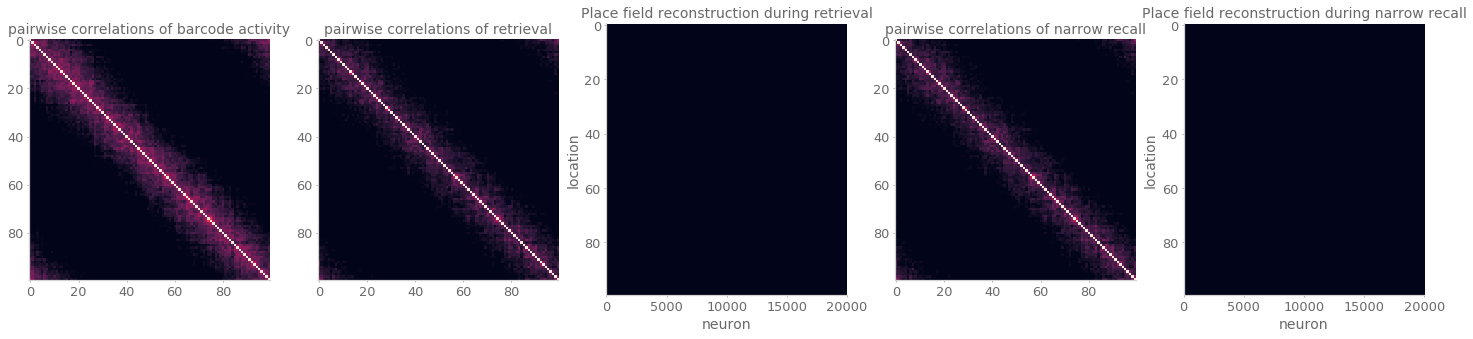

Now I just cached at location: 18


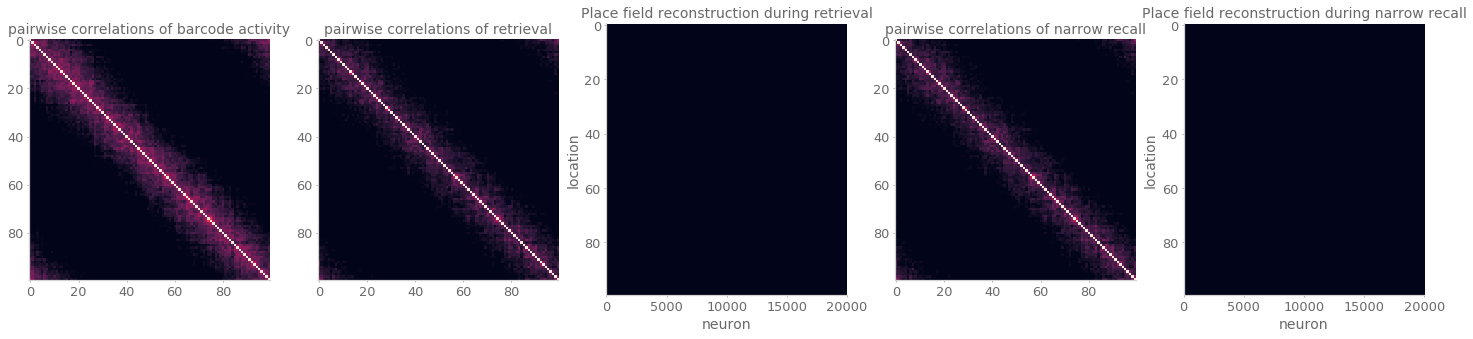

Now I just cached at location: 20


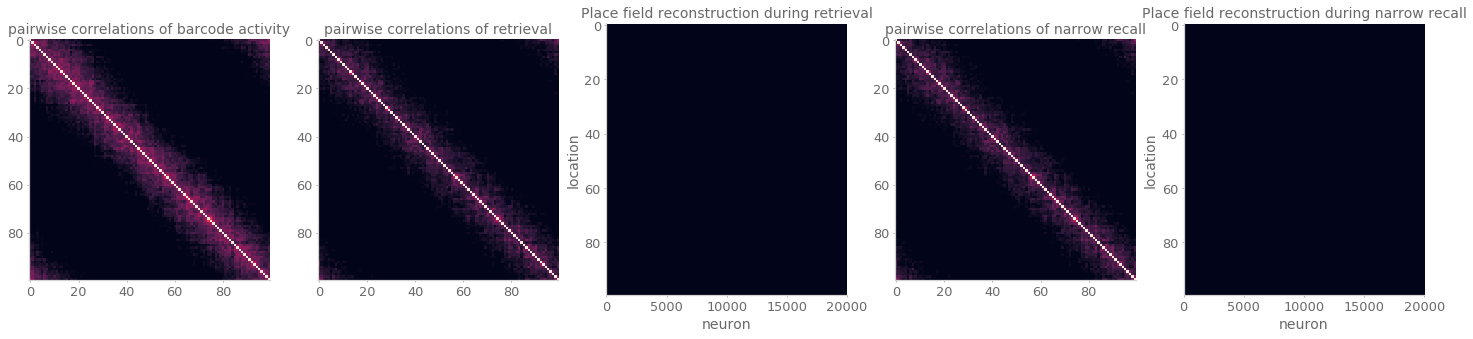

Now I just cached at location: 22


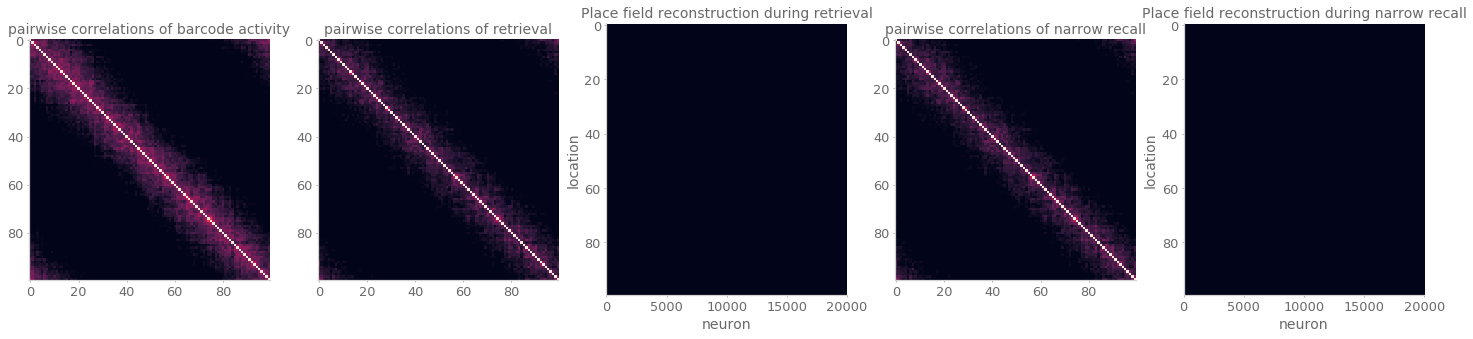

Now I just cached at location: 24


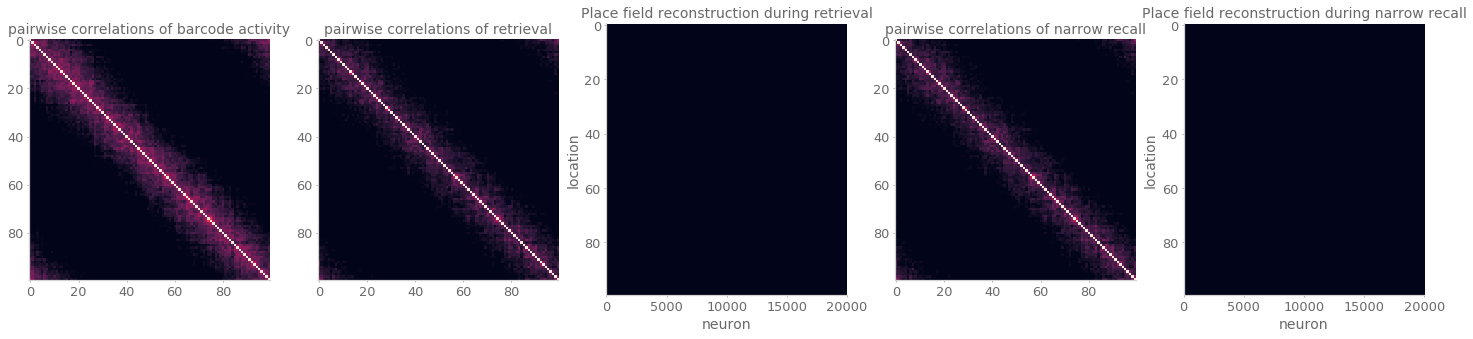

Now I just cached at location: 26


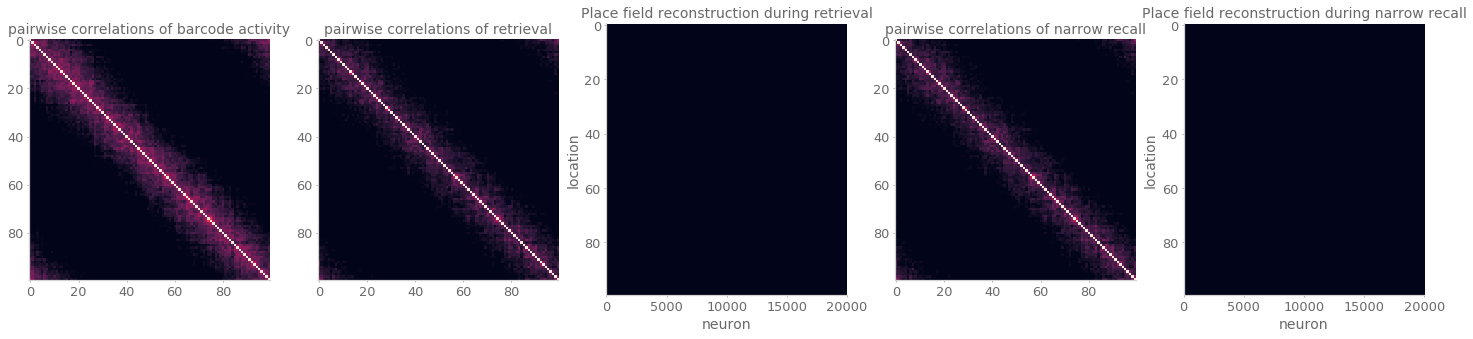

Now I just cached at location: 28


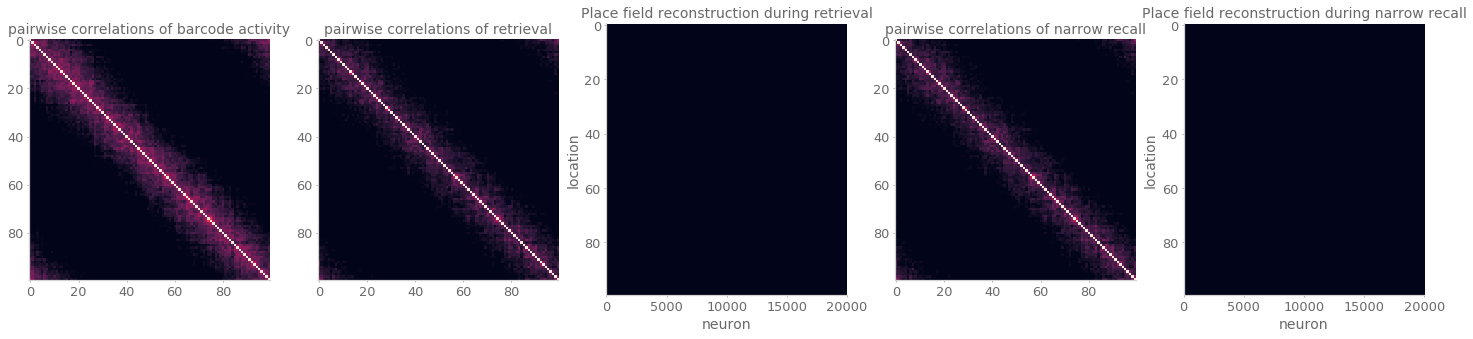

Now I just cached at location: 30


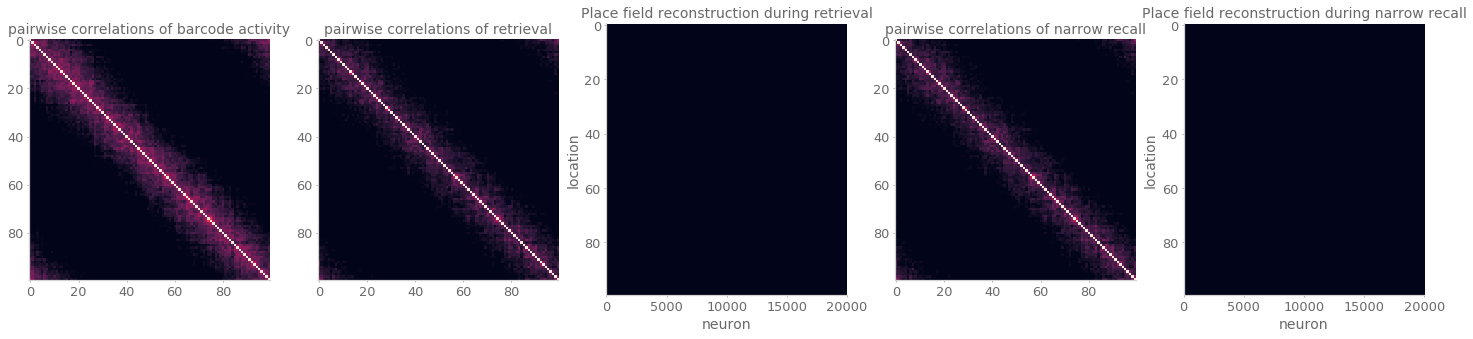

Now I just cached at location: 32


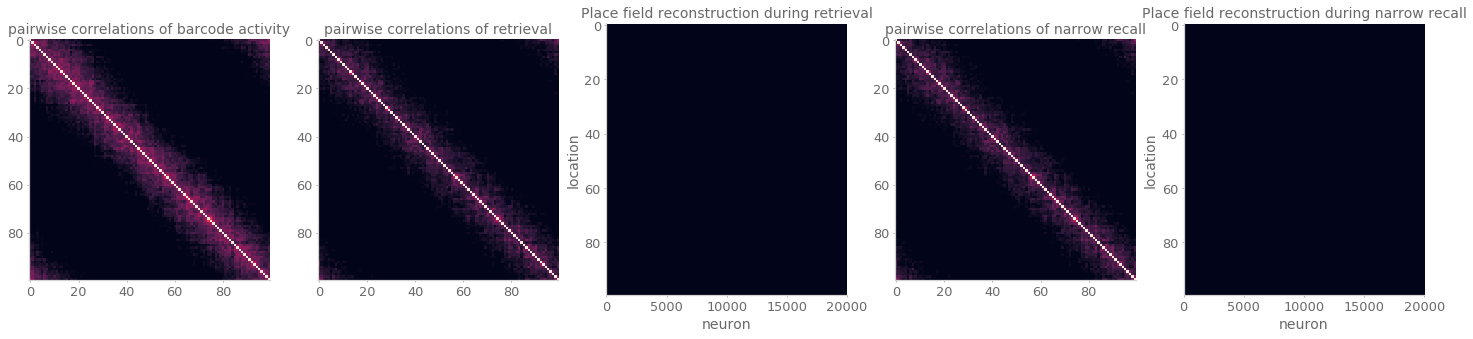

Now I just cached at location: 34


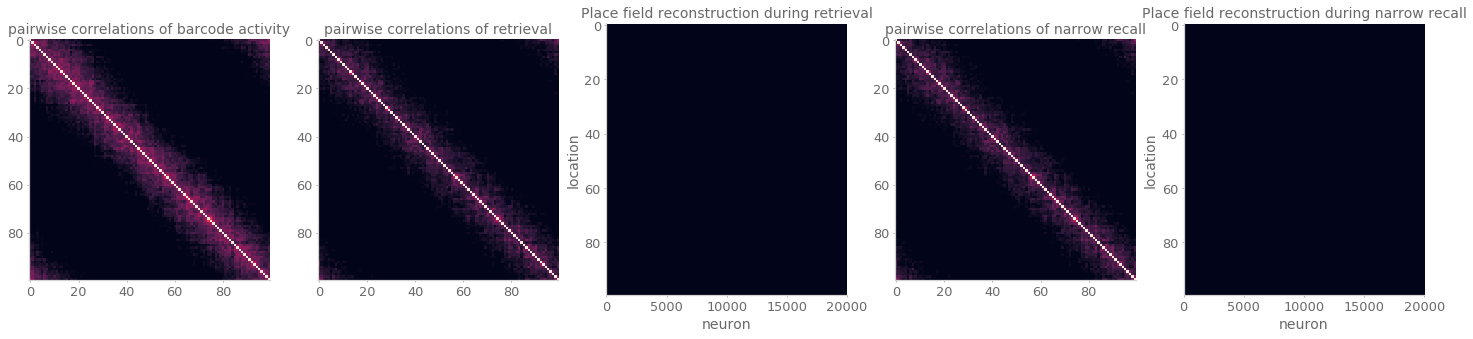

Now I just cached at location: 36


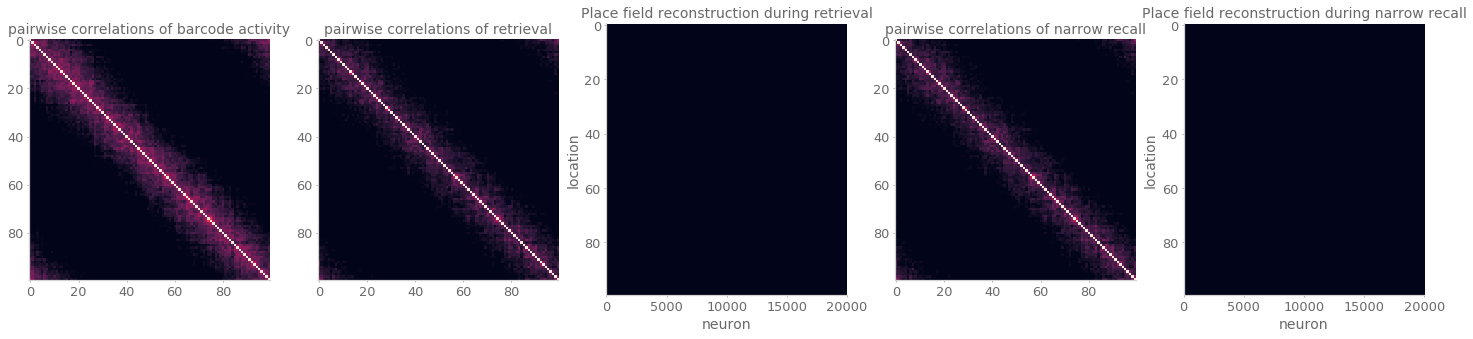

Now I just cached at location: 38


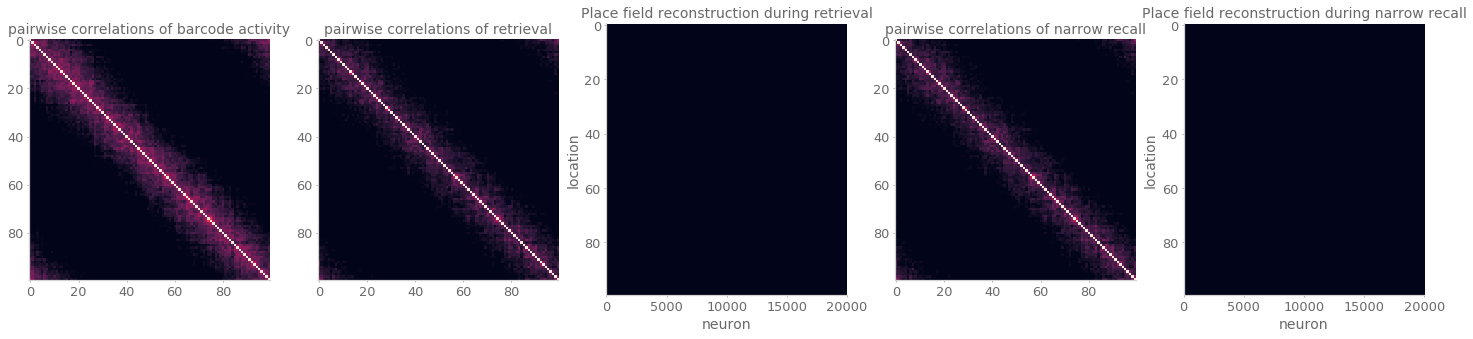

Now I just cached at location: 40


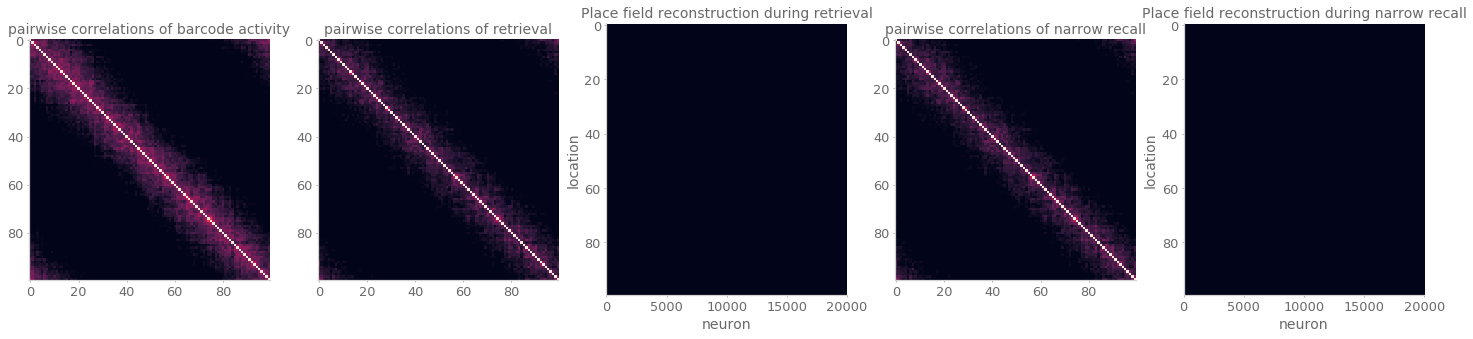

Now I just cached at location: 42


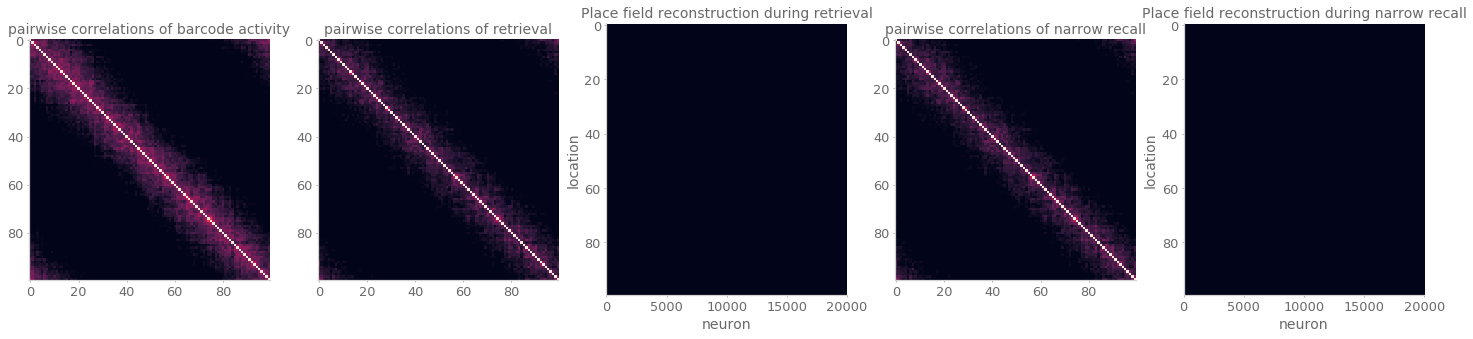

Now I just cached at location: 44


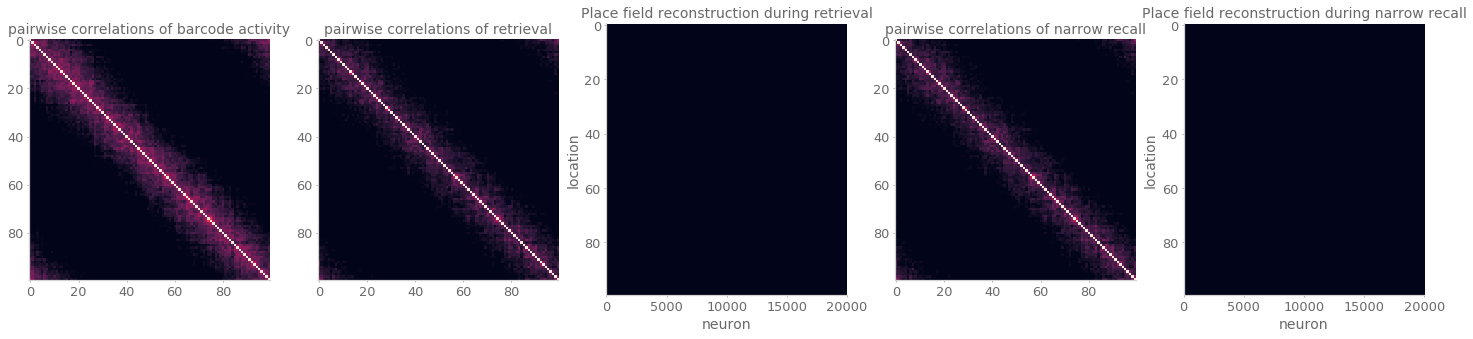

Now I just cached at location: 46


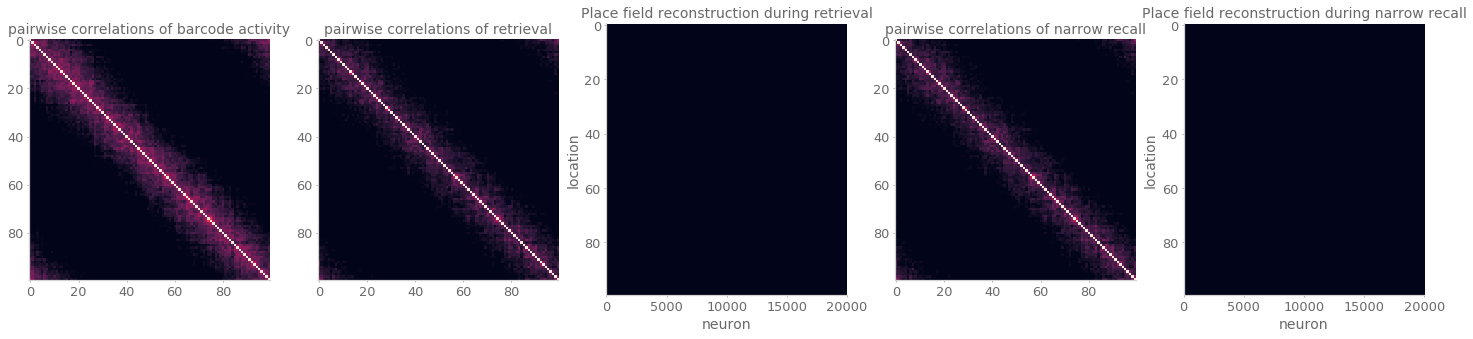

Now I just cached at location: 48


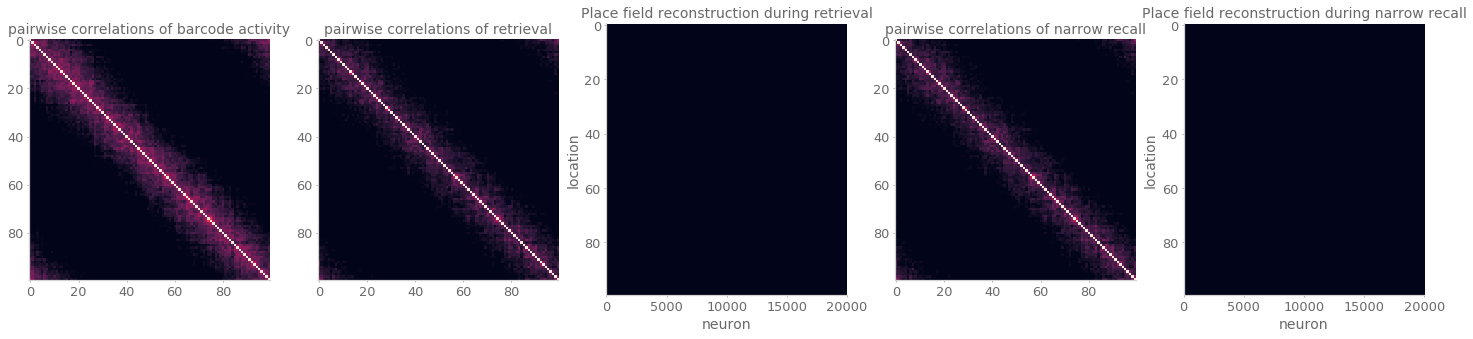

Now I just cached at location: 50


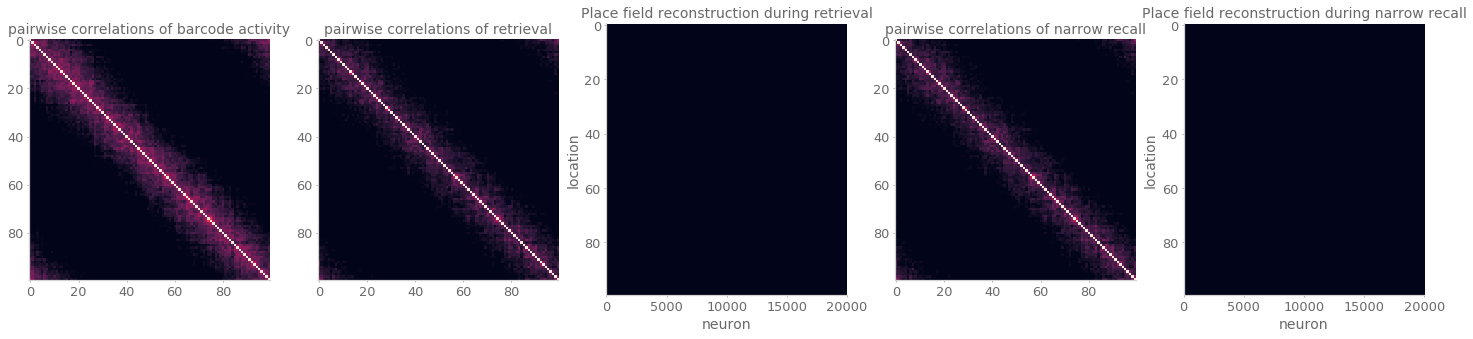

Now I just cached at location: 52


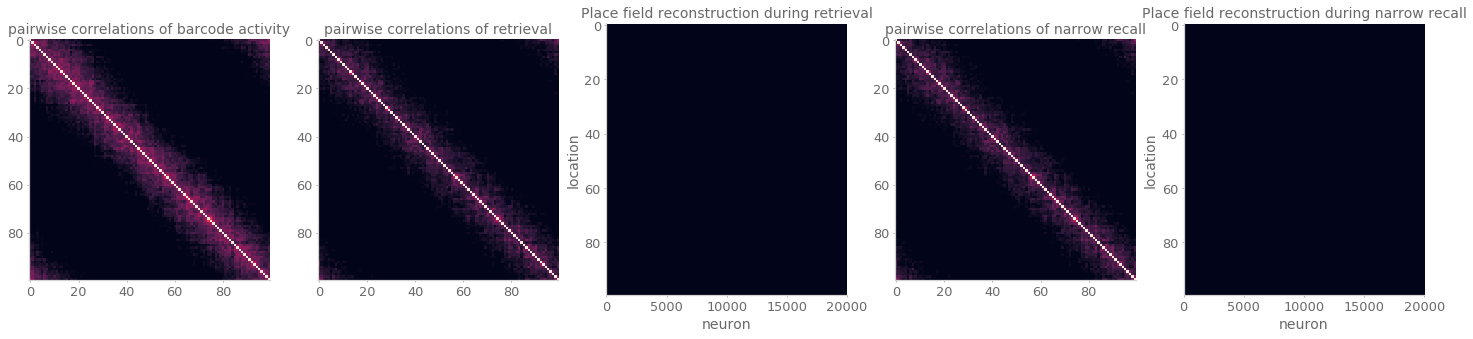

Now I just cached at location: 54


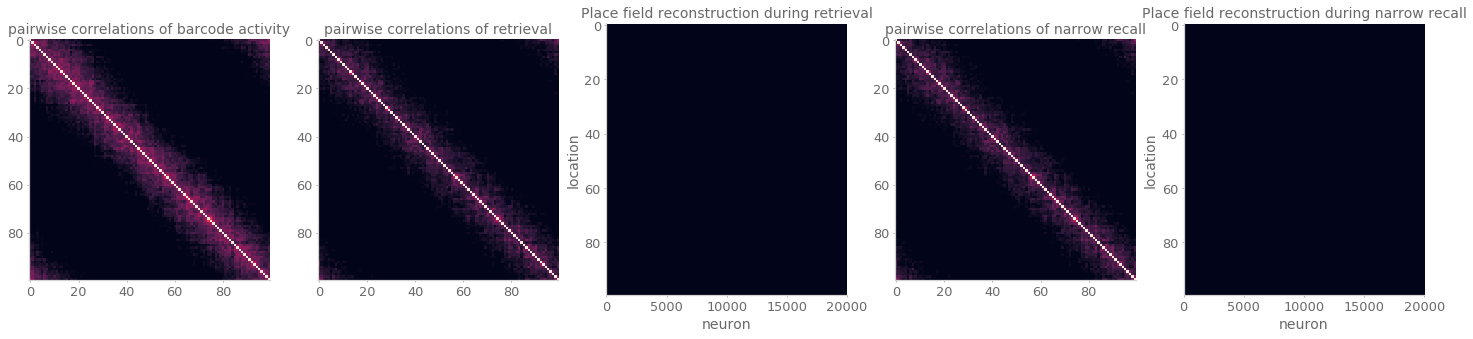

Now I just cached at location: 56


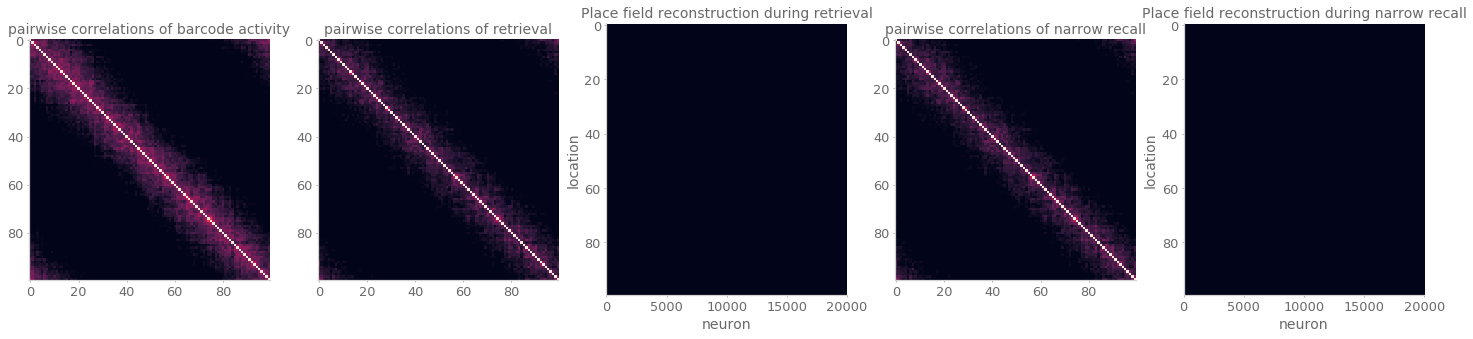

Now I just cached at location: 58


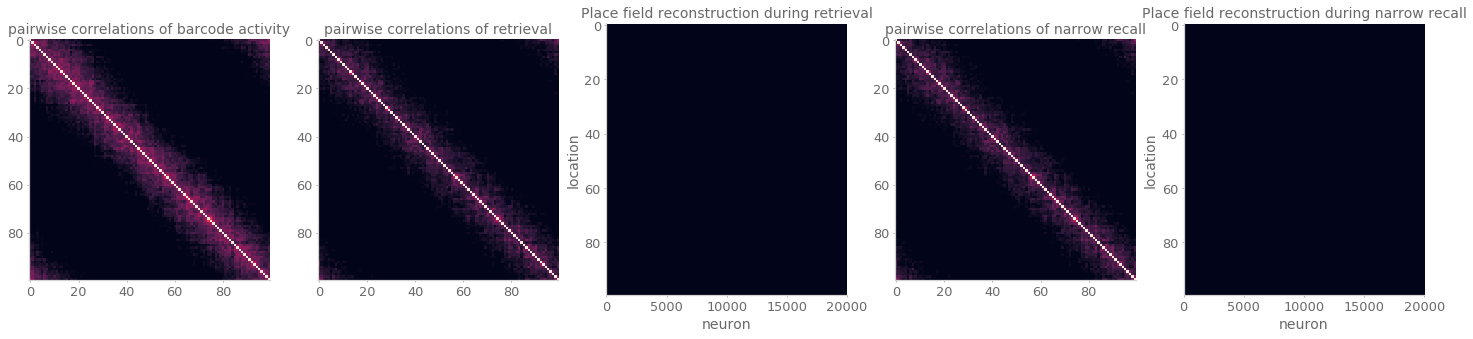

Now I just cached at location: 60


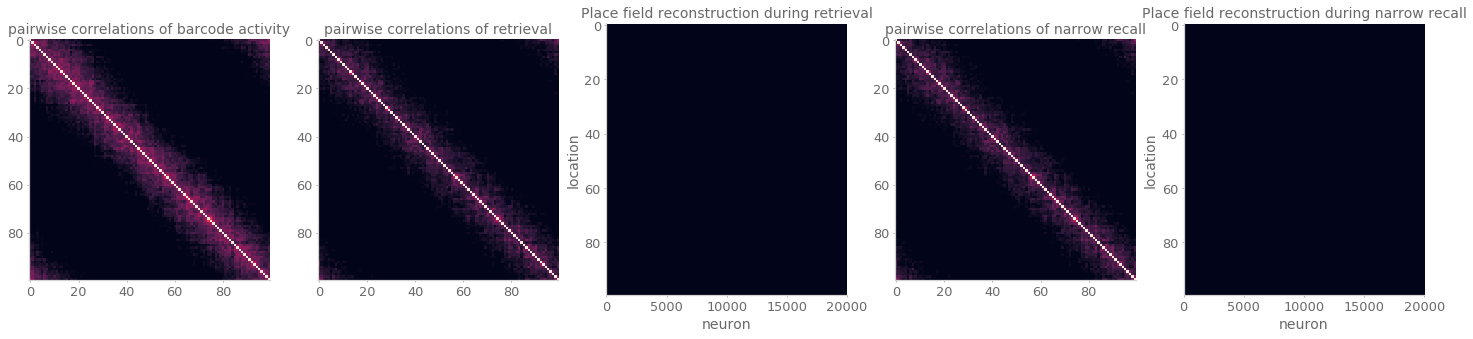

Now I just cached at location: 62


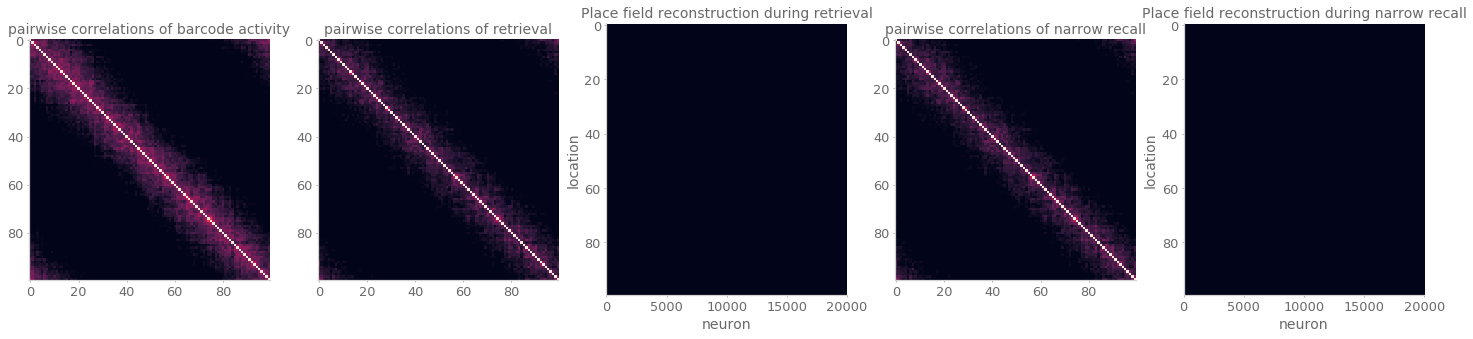

Now I just cached at location: 64


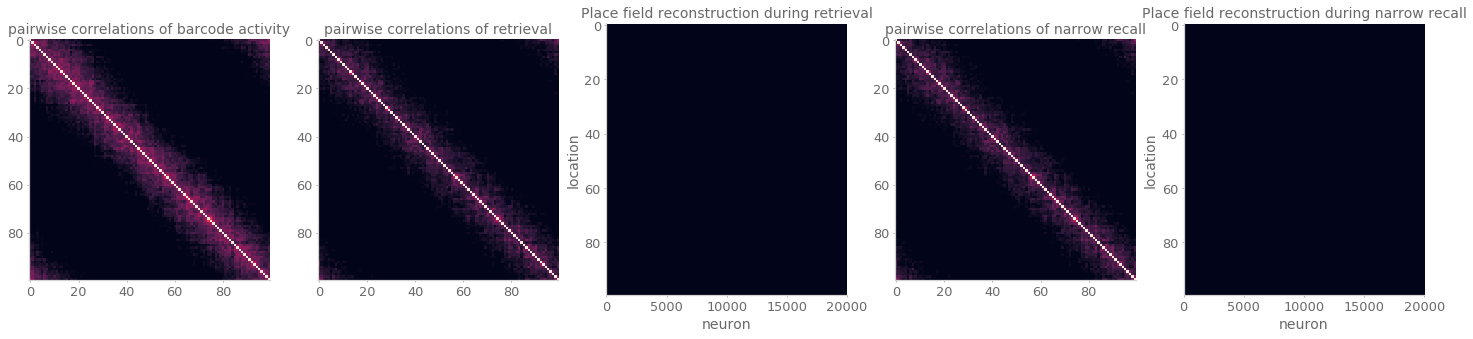

Now I just cached at location: 66


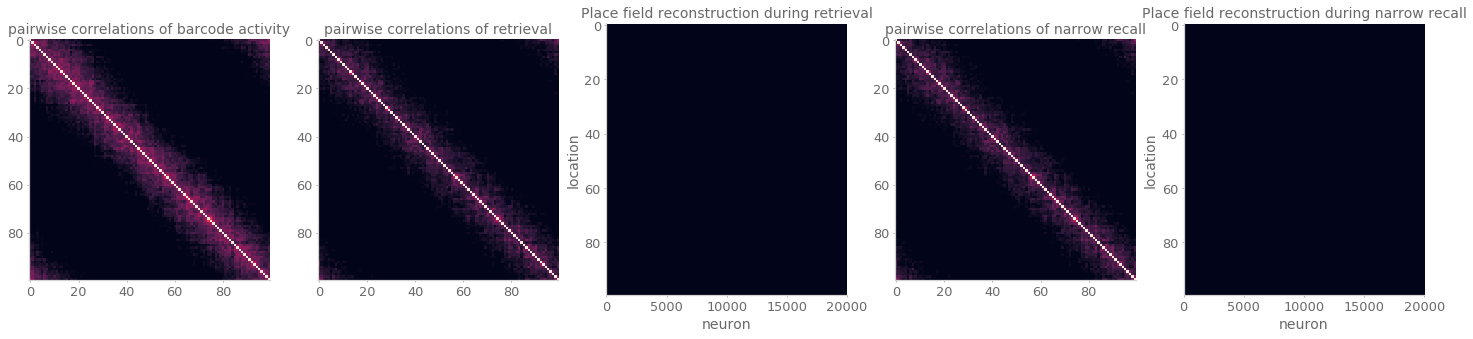

Now I just cached at location: 68


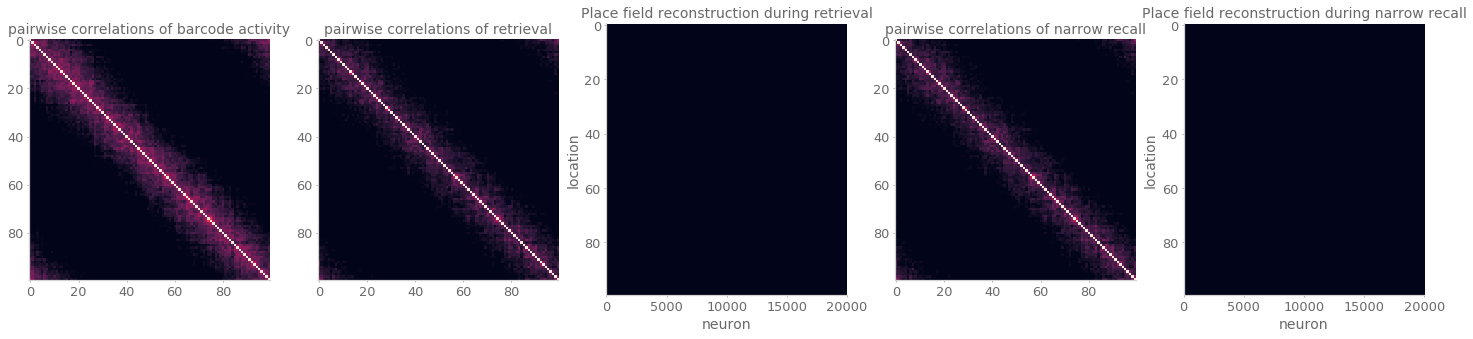

Now I just cached at location: 70


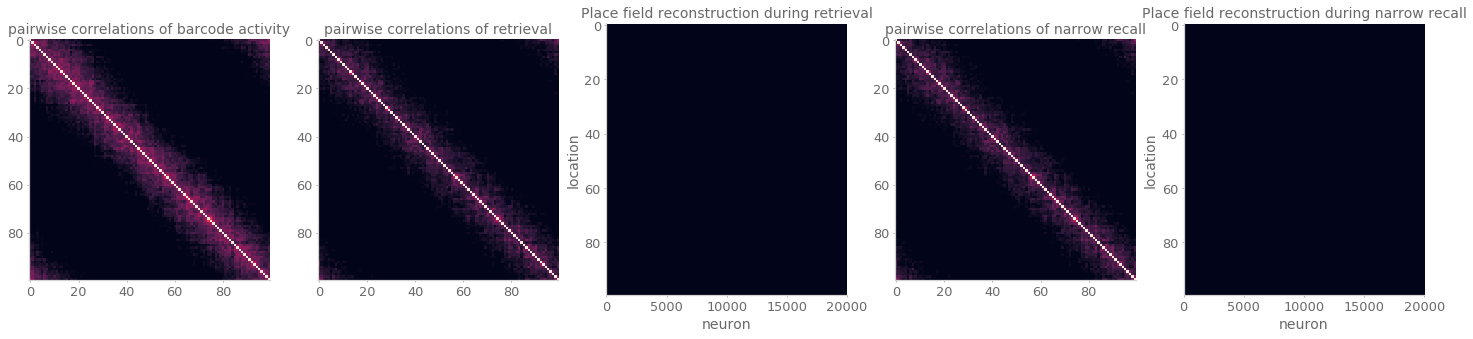

Now I just cached at location: 72


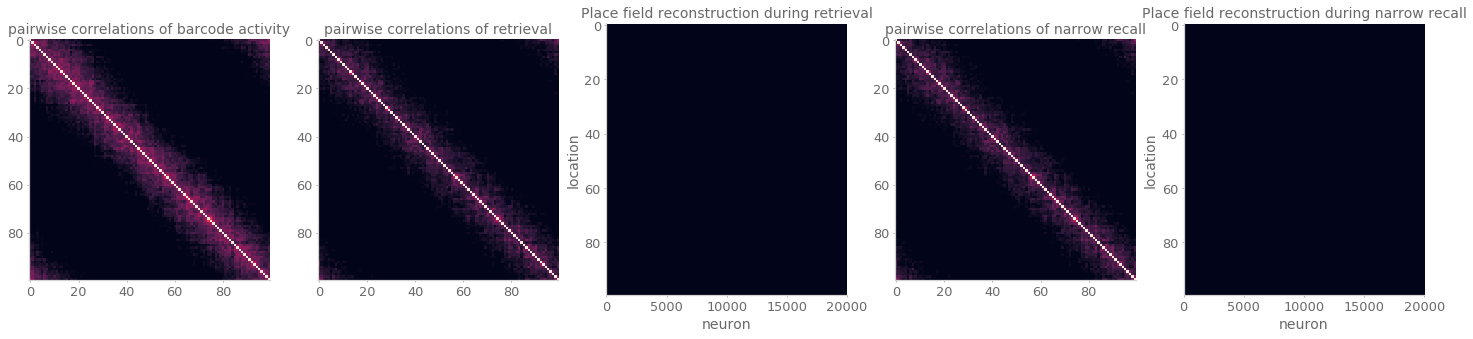

Now I just cached at location: 74


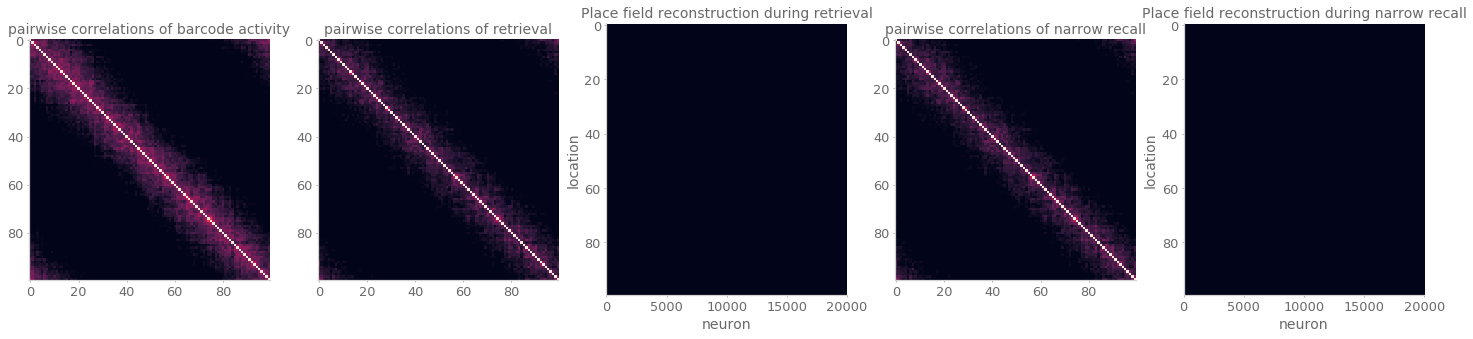

Now I just cached at location: 76


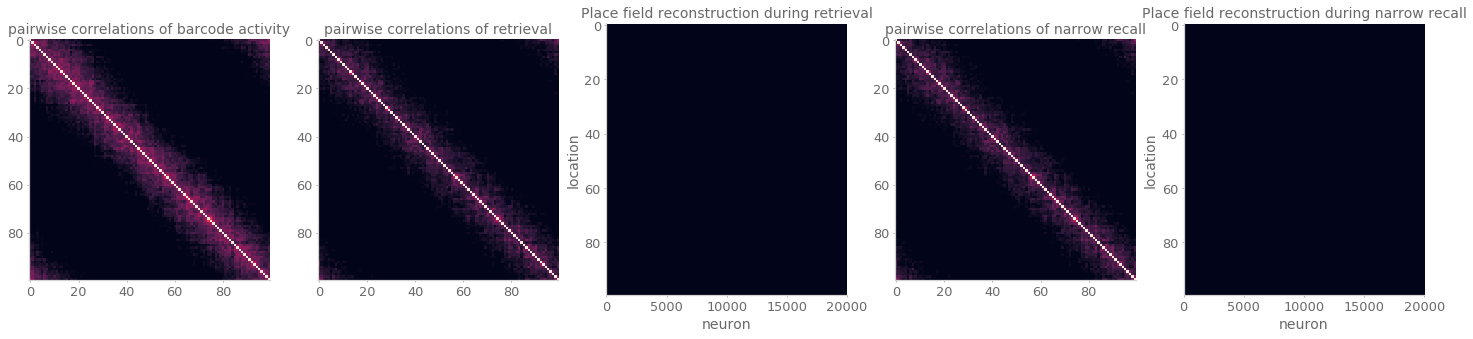

Now I just cached at location: 78


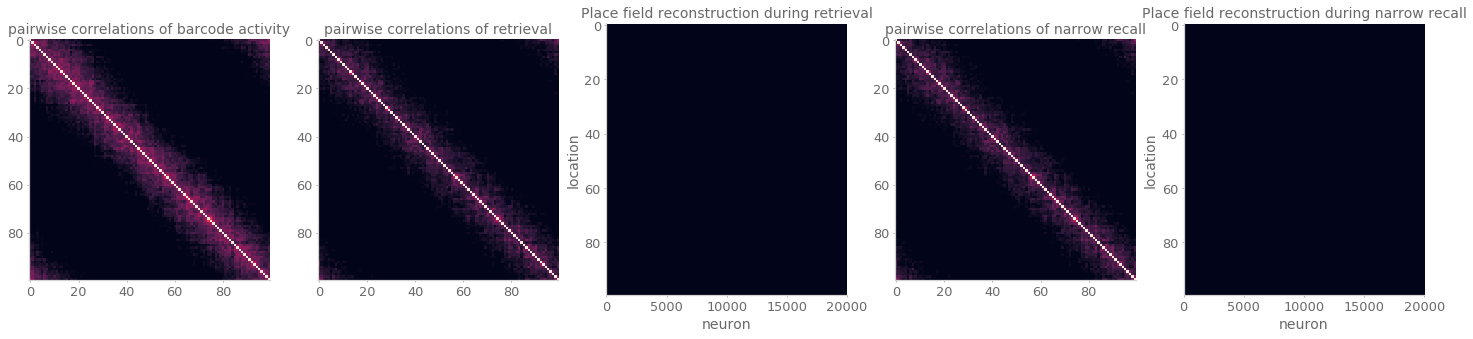

Now I just cached at location: 80


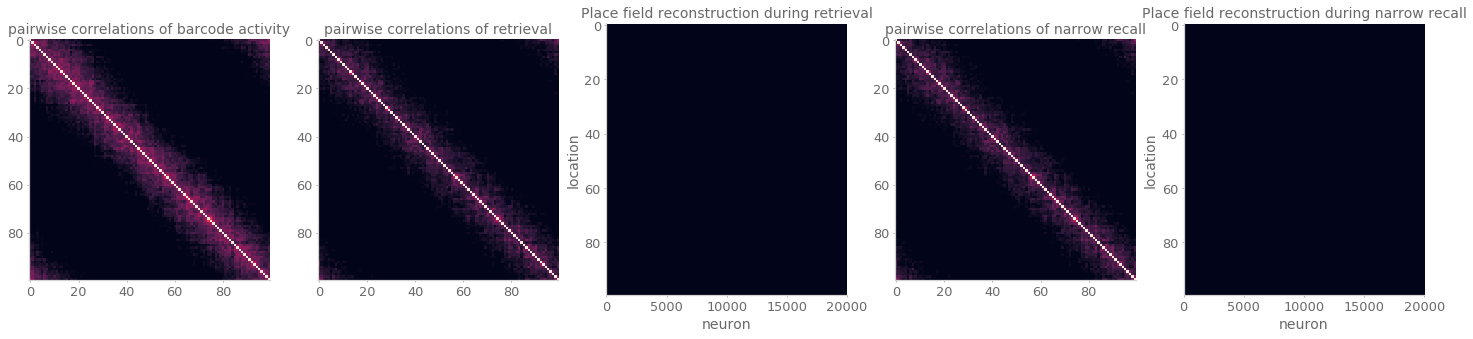

Now I just cached at location: 82


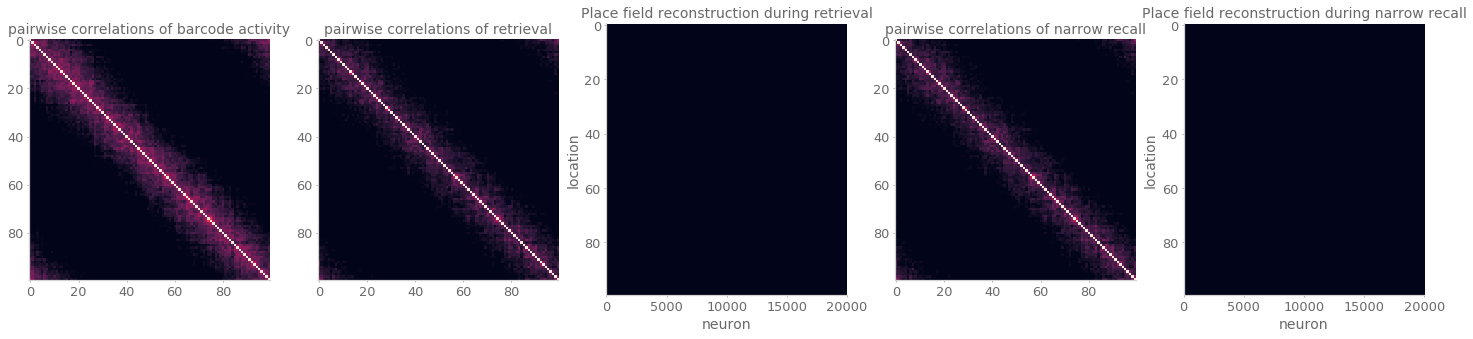

Now I just cached at location: 84


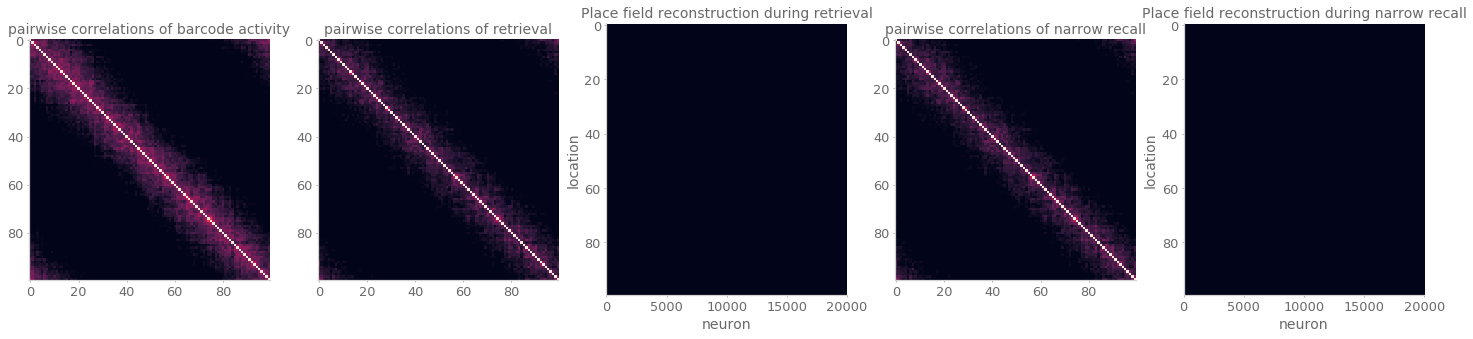

Now I just cached at location: 86


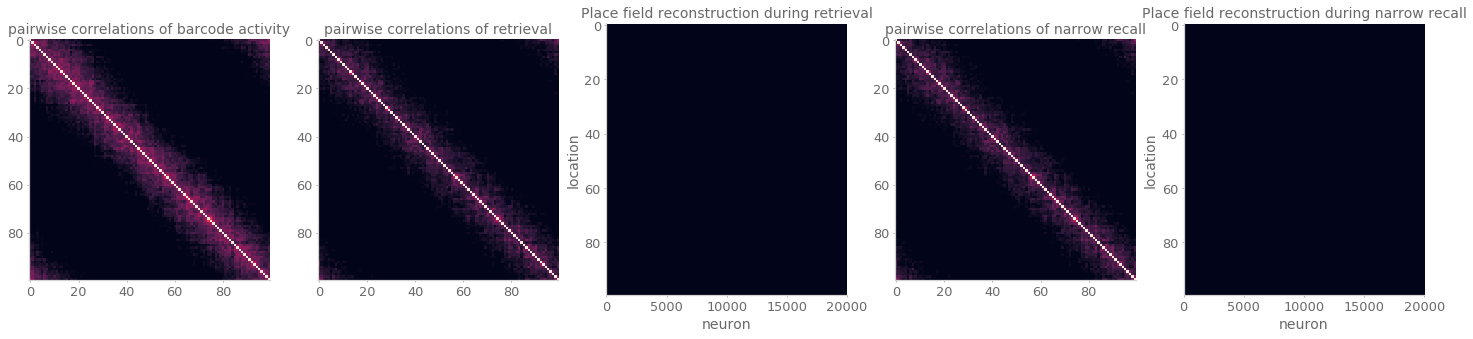

Now I just cached at location: 88


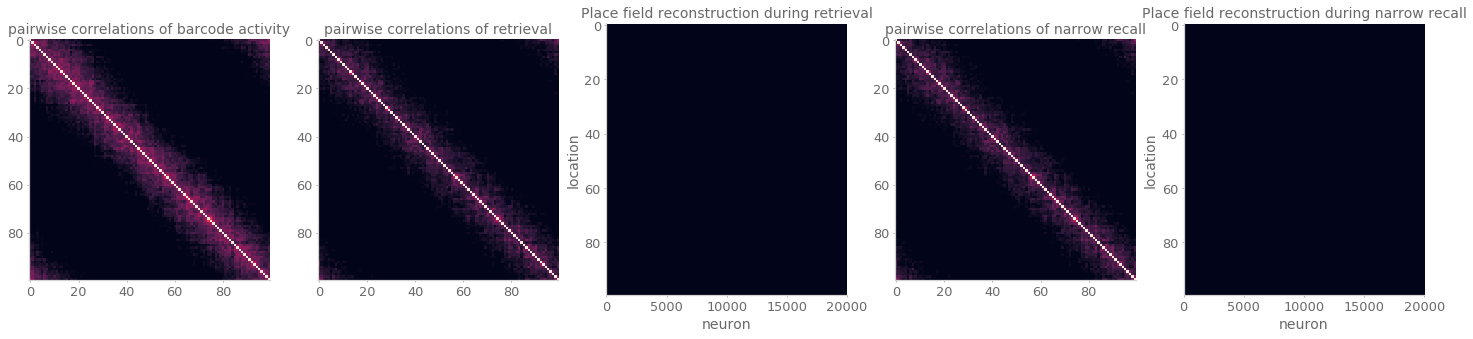

Now I just cached at location: 90


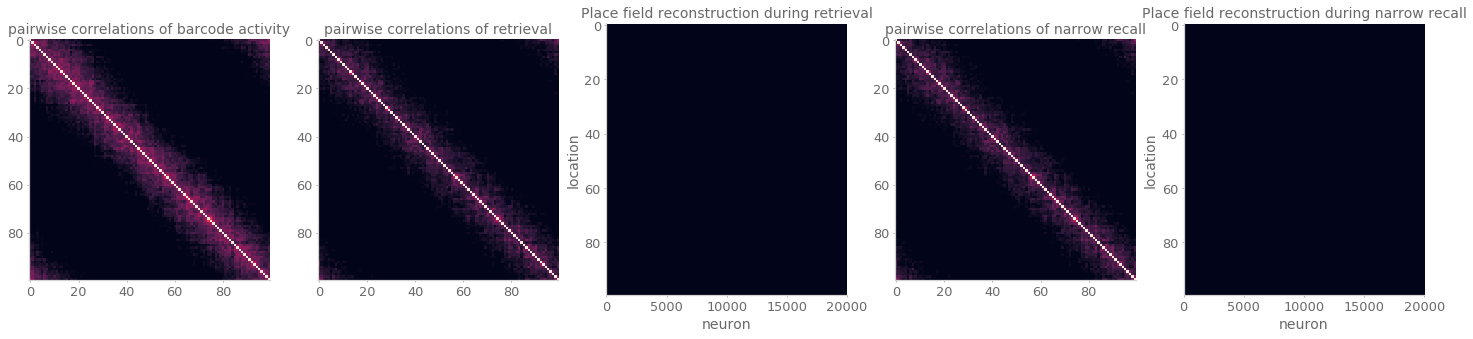

Now I just cached at location: 92


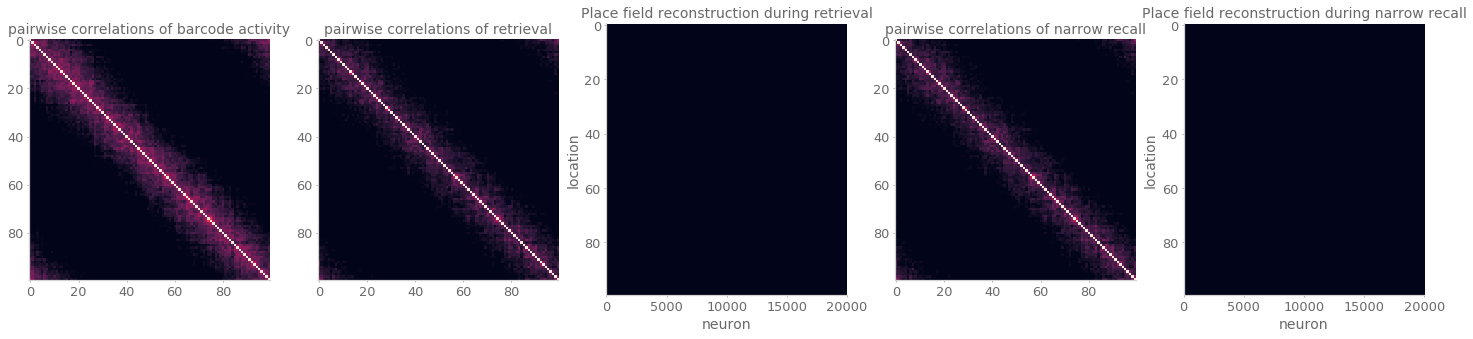

Now I just cached at location: 94


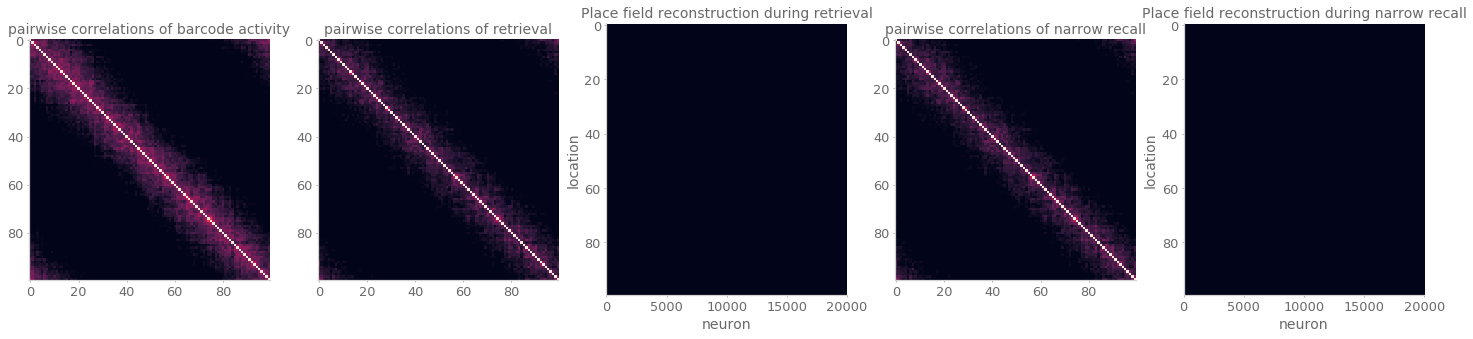

Now I just cached at location: 96


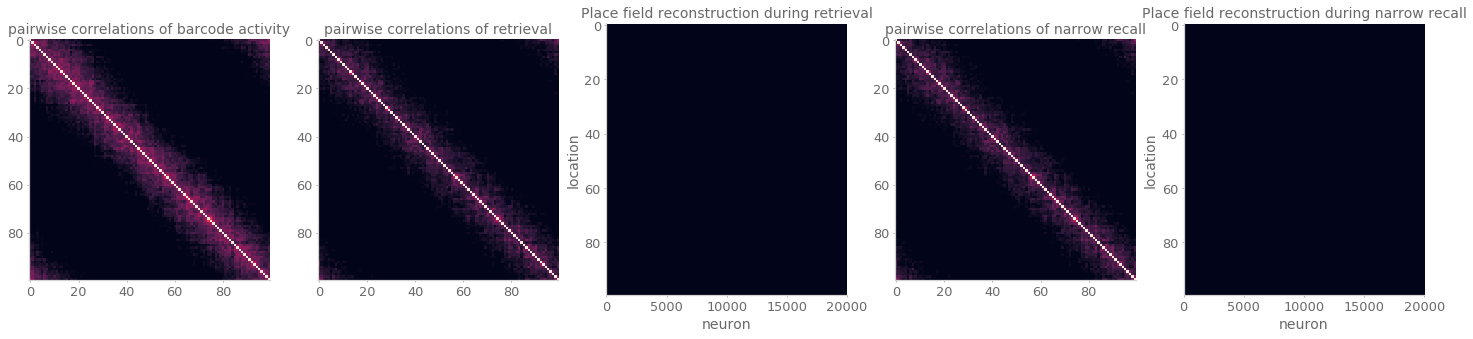

Now I just cached at location: 98


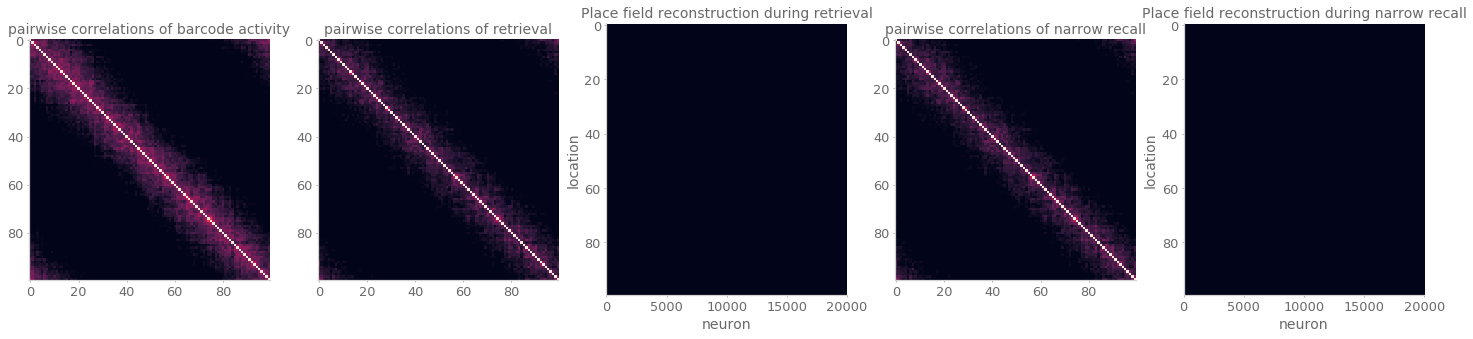

In [6]:
model.reset()
cache_acts = []
cache_acts_over_time = []
retrieval_acts_over_time = []
figsize=(4,3)

_, place_acts, _, _ = model.run_nonrecurrent(place_inputs)
place_mean = np.mean(place_acts, axis=0).flatten()
place_std = np.std(place_acts, axis=0).flatten()
plt.figure(figsize=figsize)
plt.imshow(place_acts, vmin=0,  aspect='auto')
plt.xlabel("Input Neuron")
plt.ylabel("Location")
plt.colorbar()
plt.title("Input Activity")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(pairwise_correlations_centered(place_acts), vmin=0, vmax=1)
plt.colorbar()
plt.title("Input Activity Spatial Correlation")
plt.xlabel("Input Neuron")
plt.ylabel("Input Neuron")
plt.show()

_, acts, _, _ = model.run_recurrent(place_inputs)
plt.figure(figsize=figsize)
plt.imshow(acts, vmin=0, vmax=1, aspect='auto')
plt.xlabel("RNN Neuron")
plt.ylabel("Location")
plt.colorbar()
plt.title("Cache Activity (recurrent mode)")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
plt.xlabel("RNN Neuron")
plt.ylabel("RNN Neuron")
plt.colorbar()
plt.title("Cache Activity Spatial Correlation (recurrent mode)")
plt.show()

print(f'Sparsity: {np.mean(acts>0)}')

acts_normalized = normalize(acts, ax=0)
inputs_normalized = normalize(place_acts, ax=0)
corrs = [np.corrcoef(acts_normalized[i], inputs_normalized[i])[0, 1] for i in range(num_states)]
plt.title("Correlations between place and barcode activity at each state")
plt.xlabel("Location")
plt.plot(corrs)
plt.show()

for cache_state in cache_states:
    
    fig, ax = plt.subplots(1, 5, figsize=(25, 5))
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    cache_acts.append(acts.copy())
    cache_acts_over_time.append(acts_over_time.copy())
    
    _, acts, _, _ = model.run_recurrent(place_inputs)
    ax[0].set_title("pairwise correlations of barcode activity")
    ax[0].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)

    _, acts, reconstruct, acts_over_time = model.run_recall(0, place_inputs)
    ax[1].set_title("pairwise correlations of retrieval")
    ax[1].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
    ax[2].set_xlabel("neuron")
    ax[2].set_ylabel("location")
    ax[2].imshow(reconstruct, aspect='auto')
    ax[2].set_title("Place field reconstruction during retrieval")
    retrieval_acts_over_time.append(acts_over_time.copy())
    
    _, acts, reconstruct, _ = model.run_narrow_recall(place_inputs)
    ax[3].set_title("pairwise correlations of narrow recall")
    ax[3].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
    ax[4].set_xlabel("neuron")
    ax[4].set_ylabel("location")
    ax[4].imshow(reconstruct, aspect='auto')
    ax[4].set_title("Place field reconstruction during narrow recall")
    plt.show()
    

In [7]:
preacts, acts, rr, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)

# Define cache activity as a mean over some time window

In [8]:
start_t = steps-25 # Start of time window

In [9]:
avg_cache_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = cache_acts_over_time[i][start_t:steps, location, :].mean(axis=0)
    avg_cache_acts.append(vec)
avg_cache_acts = np.array(avg_cache_acts)

In [10]:
cache_mean = avg_cache_acts.mean(axis=0)

In [11]:
avg_retrieval_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = retrieval_acts_over_time[i][start_t:steps, location, :].mean(axis=0)
    avg_retrieval_acts.append(vec)
avg_retrieval_acts = np.array(avg_retrieval_acts)

In [12]:
def nb(mu, std_scaling=1.0, mu_scaling=0.75, shift=0.0):
    """ mu is a vector of firing rates. std_scaling is a scalar. """


    mu = mu*mu_scaling + 1E-8 + shift
    std = std_scaling * np.sqrt(mu)
    std += 1E-8
    n = (mu**2)/(std**2 - mu)
    p = mu/(std**2)
    nb_mu = nbinom.rvs(n, p)
    return nb_mu.astype(float)


def nb_corr(a, b):
    nb_a = nb(a)
    nb_b = nb(b)
    return np.corrcoef(nb_a, nb_b)[0, 1]

# Fig 3ab, Fig 4: cache v. visit correlation

In [13]:
cache_cache_corr = {'Distance': [], 'Correlation': []}
cache_visit_corr = {'Distance': [], 'Correlation': []}
visit_visit_corr = {'Distance': [], 'Correlation': []}
std_scaling = 1

for i in range(len(cache_states)):
    for j in range(i, len(cache_states)):
        _distance = distance(cache_states[i], cache_states[j], num_states)
        
        cache_act_i = avg_cache_acts[i].copy()
        cache_act_j = avg_cache_acts[j].copy()
        place_act_i = place_acts[cache_states[i]].copy()
        place_act_j = place_acts[cache_states[j]].copy()
        
        for _ in range(3): # More samples
            c_c_corr = nb_corr(cache_act_i, cache_act_j)
            c_v_corr = nb_corr(cache_act_i, place_act_j)
            v_v_corr = nb_corr(place_act_i, place_act_j)

            cache_cache_corr['Distance'].append(_distance)
            cache_cache_corr['Correlation'].append(c_c_corr)

            cache_visit_corr['Distance'].append(_distance)
            cache_visit_corr['Correlation'].append(c_v_corr)

            visit_visit_corr['Distance'].append(_distance)
            visit_visit_corr['Correlation'].append(v_v_corr)
            
cache_retrieval_corr = []
for i in range(len(cache_states)):
    cache_act_i = avg_cache_acts[i].copy()
    retrieval_act_i = avg_retrieval_acts[i].copy()
    c_r_corr = nb_corr(cache_act_i, retrieval_act_i)
    cache_retrieval_corr.append(c_r_corr)

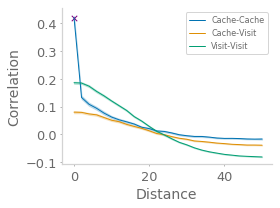

In [14]:
plt.figure(figsize=(4,3))
sns.lineplot(
    x='Distance', y='Correlation', 
    label='Cache-Cache', color='C0',
    data=pd.DataFrame(cache_cache_corr))
sns.lineplot(
    x='Distance', y='Correlation', 
    label='Cache-Visit', color='C1',
    data=pd.DataFrame(cache_visit_corr))
sns.lineplot(
    x='Distance', y='Correlation', 
    label='Visit-Visit', color='C2',
    data=pd.DataFrame(visit_visit_corr))
plt.scatter(
    0, np.mean(cache_retrieval_corr),
    color='purple', marker='x', s=30)
plt.tight_layout()
plt.legend()
plt.savefig('corr_dist.png', dpi=300)
plt.show()

# Fig 3c: Example barcodes

In [15]:
noisy_avg_cache_acts = nb(avg_cache_acts)
noisy_cache_mean = np.mean(noisy_avg_cache_acts, axis=0)

In [16]:
noisy_place_acts = nb(place_acts)
noisy_place_mean = np.mean(noisy_place_acts, axis=0).flatten()
noisy_place_std = np.std(noisy_place_acts, axis=0).flatten()

In [17]:
barcodes = []
place_codes = []
for i in range(len(cache_states)):
    location = cache_states[i]
    
    # Cache activations
    _cache_act = noisy_avg_cache_acts[i].copy()
    _cache_act -= noisy_cache_mean
    
    # Place activations
    _place_act = noisy_place_acts[location].copy()
    _place_act -= noisy_place_mean
    _place_act /= np.linalg.norm(_place_act)
    place_codes.append(_place_act)
    
    # Define barcode
    projection = np.dot(_cache_act, _place_act) * _place_act
    barcode = _cache_act - projection
    barcodes.append(barcode)

In [18]:
dead_neurons = np.where(np.sum(np.array(place_codes)**2, axis=0) ==0)[0]
alive_neurons = np.where(np.sum(np.array(place_codes)**2, axis=0) > 0)[0]
argmaxes = np.argmax(np.array(place_codes)[:, alive_neurons], axis=0)
neuron_order = np.concatenate([dead_neurons, alive_neurons[np.argsort(argmaxes)]], axis=0)

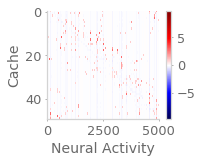

In [19]:
# Chettih et al Figure 3
x = np.array(np.array(barcodes)[:, neuron_order])
plt.figure(figsize=(2.5,2))
plt.imshow(x, cmap='seismic', interpolation='nearest', aspect='auto')
plt.clim(-x.max(), x.max())
plt.colorbar()
plt.ylabel('Cache')
plt.xlabel('Neural Activity')
plt.savefig('barcodes.png', dpi=300)
plt.show()

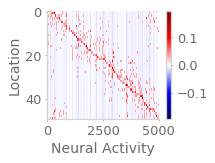

In [20]:
# Chettih et al Figure 3
x = np.array(np.array(place_codes)[:, neuron_order])
plt.figure(figsize=(2.5,2))
plt.imshow(x, cmap='seismic', interpolation='nearest', aspect='auto')
plt.clim(-x.max(), x.max())
plt.colorbar()
plt.ylabel('Location')
plt.xlabel('Neural Activity')
plt.show()

# Fig 2: Barcode neuron participation

In [21]:
noisy_avg_cache_acts = nb(avg_cache_acts)
noisy_cache_mean = np.mean(noisy_avg_cache_acts, axis=0)

In [22]:
activities = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = avg_cache_acts[i].copy()
    activities.append((vec-place_mean)/(place_std))

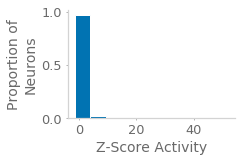

In [23]:
x = np.array(activities)
n_caches, n_neurons = x.shape
plt.figure(figsize=(3,2))
plt.hist(
    x.flatten(),
    weights=[1/x.size]*x.size)
plt.ylabel('Proportion of\nNeurons')
plt.xlabel('Z-Score Activity')
plt.show()

In [24]:
vals = []
for i in range(x.shape[1]):
    _x = x[:,i]
    p = np.sum(_x<0)/_x.size
    vals.append(p)
val = np.mean(vals)
print(f'Neurons fire under their place mean in {val*100:.2f} % of Caches')

Neurons fire under their place mean in 89.65 % of Caches


# Individual Cells

In [25]:
n_samples = 20

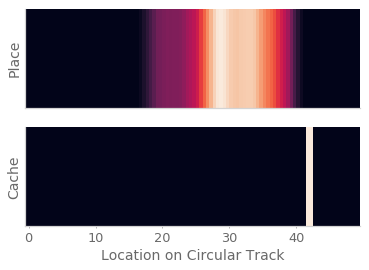

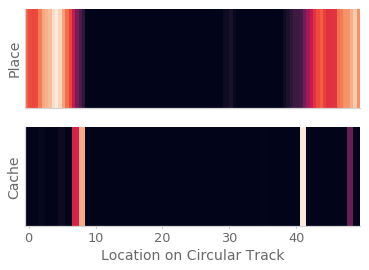

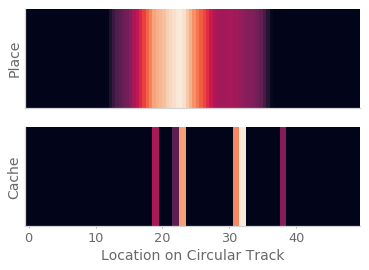

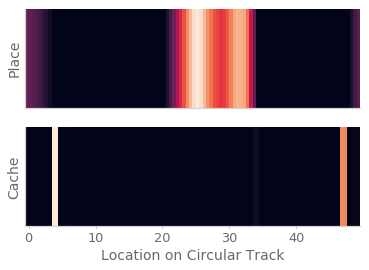

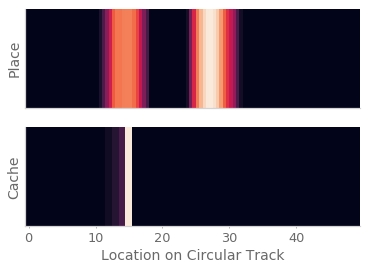

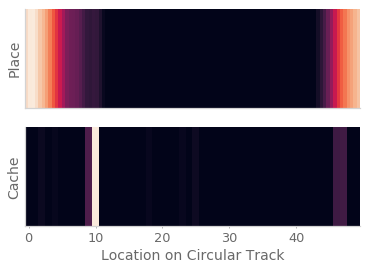

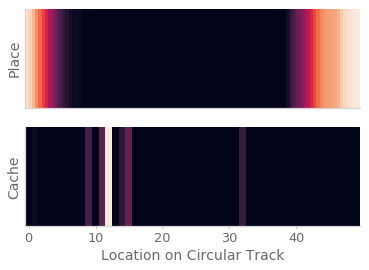

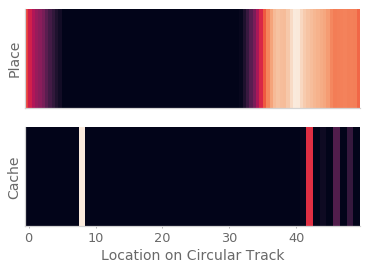

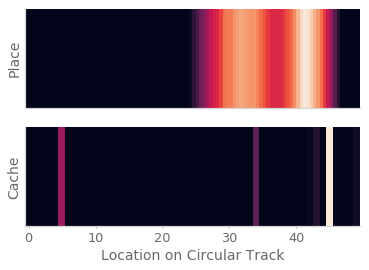

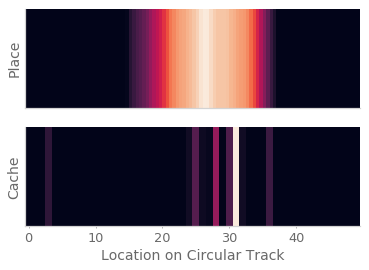

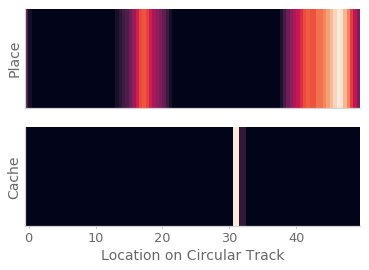

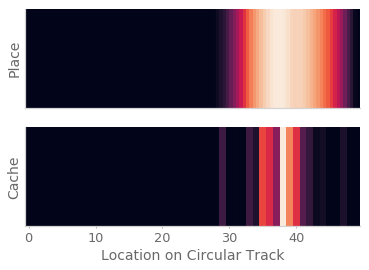

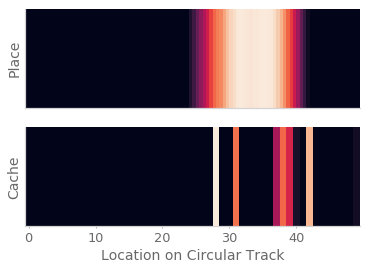

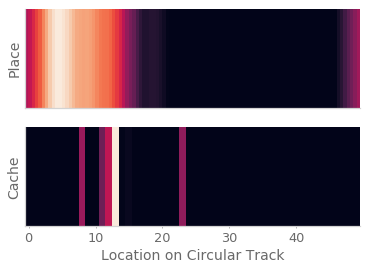

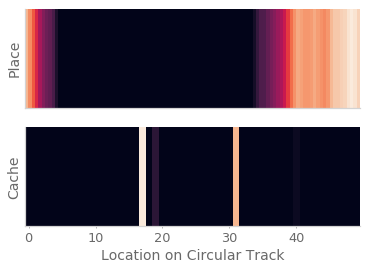

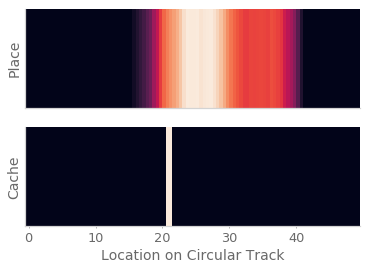

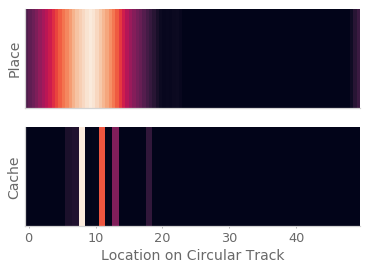

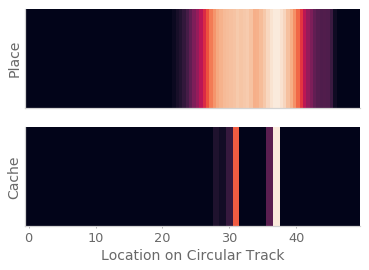

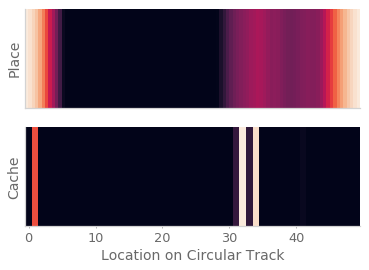

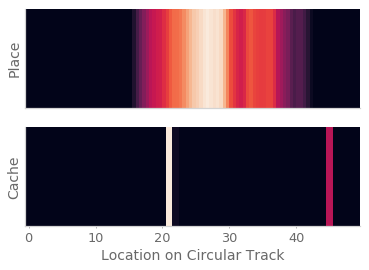

In [26]:
for _ in range(n_samples):
    idx = np.random.choice(N_bar)
    fig, axs = plt.subplots(2, 1)
    axs[0].imshow(place_acts[:, idx].reshape((1,-1)), aspect='auto')
    axs[1].imshow(avg_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('Location on Circular Track')
    axs[1].set_xlabel('Location on Circular Track')
    axs[0].set_ylabel('Place')
    axs[1].set_ylabel('Cache')
    plt.show()